In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
y = 3*x+5
y

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

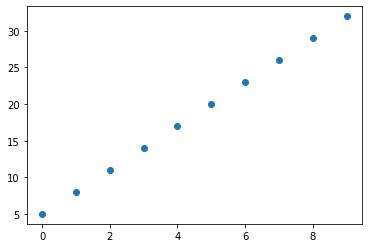

In [4]:
plt.scatter(x,y)

In [5]:
X=x.reshape((-1,1))
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [6]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X,y) #There Will be error if x which is 1D if don't modify to 2D using reshape also point to be noted y can be 1D. 

LinearRegression()

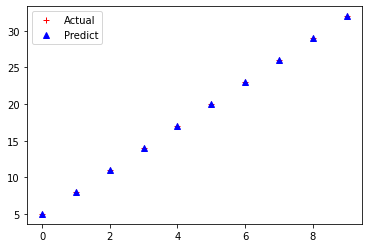

In [7]:
plt.plot(x,y,'r+',label="Actual") #Actual Answer
plt.plot(x,lin.predict(X),'b^',label="Predict")#predicted Value
plt.legend()

In [8]:
y_pred = lin.predict(X)

In [9]:
lin.intercept_,lin.coef_

(4.9999999999999964, array([3.]))

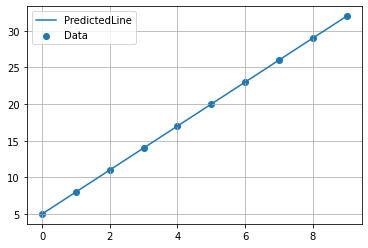

In [10]:
y_line=lin.coef_*x+lin.intercept_
plt.scatter(x,y,label="Data")

plt.plot(x,y_line,label="PredictedLine")
plt.grid()
plt.legend()
plt.show()


In [11]:
for a,b in zip(y_pred,y):
  print(a,b)

4.9999999999999964 5
7.999999999999997 8
10.999999999999998 11
14.0 14
17.0 17
20.0 20
23.000000000000004 23
26.000000000000004 26
29.000000000000004 29
32.0 32


In [12]:
print(lin.coef_,lin.intercept_) #slope and Intercept

[3.] 4.9999999999999964


#Let's Have Outliear.

In [13]:
y1=3*x+5
y1[-1]=100
y1

array([  5,   8,  11,  14,  17,  20,  23,  26,  29, 100])

In [14]:
lin.fit(X,y1)

LinearRegression()

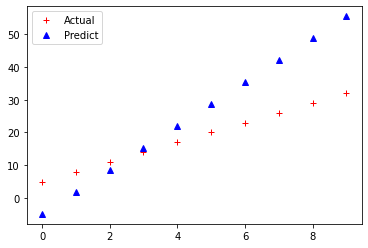

In [15]:
plt.plot(x,y,'r+',label="Actual") #Actual Answer
plt.plot(x,lin.predict(X),'b^',label="Predict")#predicted Value
plt.legend()

#Linear Regression Havily affected By Outliers.

In [16]:
X.shape,y1.shape

((10, 1), (10,))

In [17]:
y1

array([  5,   8,  11,  14,  17,  20,  23,  26,  29, 100])

DataColumns have Multiple Columns we have shown only for 1 column.


Hyperplane.

# 2D

In [18]:
x1 = np.arange(10)
x2 = np.linspace(-5,3,10)
print(x1,x2)

[0 1 2 3 4 5 6 7 8 9] [-5.         -4.11111111 -3.22222222 -2.33333333 -1.44444444 -0.55555556
  0.33333333  1.22222222  2.11111111  3.        ]


In [19]:
y=3*x1+5*x2+8


In [20]:
import plotly.express as px
px.scatter_3d(x=x1,y=x2,z=y)


In [21]:
X=np.hstack([x1.reshape(-1,1),x2.reshape(-1,1)])

In [22]:
X

array([[ 0.        , -5.        ],
       [ 1.        , -4.11111111],
       [ 2.        , -3.22222222],
       [ 3.        , -2.33333333],
       [ 4.        , -1.44444444],
       [ 5.        , -0.55555556],
       [ 6.        ,  0.33333333],
       [ 7.        ,  1.22222222],
       [ 8.        ,  2.11111111],
       [ 9.        ,  3.        ]])

In [23]:
lin.fit(X,y)

LinearRegression()

In [24]:
y_pred_2d = lin.predict(X)

In [25]:
lin.coef_,lin.intercept_

(array([4.15862069, 3.69655172]), 1.482758620689653)

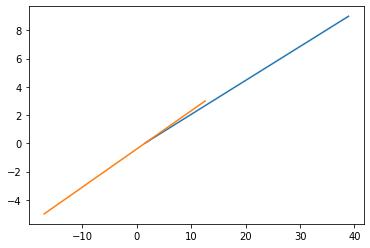

In [26]:
y_line2=lin.coef_*X+lin.intercept_
plt.plot(y_line2,X)
plt.show()

In [27]:
for a,b in zip(y_pred_2d,y):
  print(a,b)

-17.000000000000007 -17.0
-9.555555555555557 -9.555555555555554
-2.1111111111111143 -2.1111111111111107
5.333333333333332 5.333333333333332
12.777777777777777 12.777777777777777
20.22222222222222 20.22222222222222
27.666666666666664 27.666666666666664
35.11111111111111 35.11111111111111
42.55555555555556 42.55555555555556
50.0 50.0


In [28]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(x = x1, y = x2, z = y, name = 'actual'))

fig.add_trace(go.Scatter3d(x = x1, y = x2, z = y_pred_2d, name = 'predict'))

fig.show()

#LinearRegression From Scratch

In [29]:
class LinearRegressionScratch:

  def __init__(self,learning_rate,iterations):
    self.learning_rate=learning_rate
    self.iterations=iterations

  def fit(self,X,Y):
    #fit Method ka kaam hota hai ki ye best fit line predict krta hai.
    row,column = X.shape #n pr number of instances,m pr number of feature
    #Now we Need To Take Slope or Weights
    #Weights Kitni Hone Chahiye Ye number of Columns
    self.W = np.zeros(column) #initial Line zeros wala hai
    self.b =0
    #Y Ye Actual Hai
    #Y_pred= Wx+b
    for i in range(self.iterations):
      y_pred_3d = self.predict(X)
      dw = -2 * ((X.T).dot((Y-y_pred_3d)))/row
      db = -2 *(Y-y_pred_3d).sum()/row

      self.W = self.W - self.learning_rate*dw
      self.b = self.b - self.learning_rate*db

     

    

      

  def predict(self,X):
    return X.dot(self.W)+self.b #Abhi Ke liye Mann loKi W mil Gya hai.(slope or Weights)
    #W 1D Array



#Stocastic Gradient Descent:
1. Taking 1 - 1 Instance into Account.
1-1 Instance Is Taken Randomly,and Y value is predicted based on cost ,I mean new slope and intercept value new line is given and further Iterated.

But It Is Possible that It Will Get Affected By Outliear and new Line can be close to Outliear.
Therefore New thing Came to Existence:
Mini-Batch Stocastic Gradient Descent:
This Will Work On k-Stocatic Gradient.


In [30]:
y.shape

(10,)

In [31]:
X.shape

(10, 2)

In [32]:
X.T.dot(y)

array([1356.66666667,  380.92592593])

In [33]:
X.T.dot((y)) #as dw need to be vector of 1D as itis slope vector

array([1356.66666667,  380.92592593])

In [34]:
X.reshape(-1)

array([ 0.        , -5.        ,  1.        , -4.11111111,  2.        ,
       -3.22222222,  3.        , -2.33333333,  4.        , -1.44444444,
        5.        , -0.55555556,  6.        ,  0.33333333,  7.        ,
        1.22222222,  8.        ,  2.11111111,  9.        ,  3.        ])

In [35]:
X

array([[ 0.        , -5.        ],
       [ 1.        , -4.11111111],
       [ 2.        , -3.22222222],
       [ 3.        , -2.33333333],
       [ 4.        , -1.44444444],
       [ 5.        , -0.55555556],
       [ 6.        ,  0.33333333],
       [ 7.        ,  1.22222222],
       [ 8.        ,  2.11111111],
       [ 9.        ,  3.        ]])

In [36]:
y.shape

(10,)

In [37]:
X.shape

(10, 2)

In [38]:
W=np.array([10,20])
W.shape

(2,)

In [39]:
X

array([[ 0.        , -5.        ],
       [ 1.        , -4.11111111],
       [ 2.        , -3.22222222],
       [ 3.        , -2.33333333],
       [ 4.        , -1.44444444],
       [ 5.        , -0.55555556],
       [ 6.        ,  0.33333333],
       [ 7.        ,  1.22222222],
       [ 8.        ,  2.11111111],
       [ 9.        ,  3.        ]])

In [40]:
X.dot(W) #.dot Follow Matrix Multiplication

array([-100.        ,  -72.22222222,  -44.44444444,  -16.66666667,
         11.11111111,   38.88888889,   66.66666667,   94.44444444,
        122.22222222,  150.        ])

In [41]:
W*X #Simple Multiplication Does'tfollow Matrix Multiplication

array([[   0.        , -100.        ],
       [  10.        ,  -82.22222222],
       [  20.        ,  -64.44444444],
       [  30.        ,  -46.66666667],
       [  40.        ,  -28.88888889],
       [  50.        ,  -11.11111111],
       [  60.        ,    6.66666667],
       [  70.        ,   24.44444444],
       [  80.        ,   42.22222222],
       [  90.        ,   60.        ]])

In [42]:
linScratch = LinearRegressionScratch(0.01,1000)

In [43]:
linScratch.fit(X,y)

In [44]:
linScratch.predict(X)

array([-17.        ,  -9.55555556,  -2.11111111,   5.33333333,
        12.77777778,  20.22222222,  27.66666667,  35.11111111,
        42.55555556,  50.        ])

# Gradient Descent

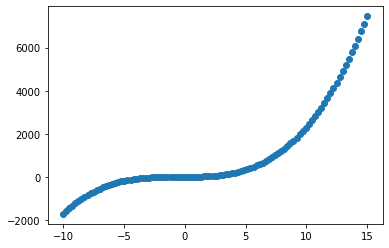

In [45]:
x = np.linspace(-10,15,100)
y=3*x*x + 2*x + 2*x*x*x#This y is made up of m1.x^2 + m2.x+m3.x^3
plt.scatter(x,y)


In [46]:
x.shape


(100,)

In [47]:
y.shape

(100,)

In [48]:
i = x*x
i.shape

(100,)

In [49]:
x1=x.reshape(-1,1)

In [50]:
lin.fit(x1,y)

LinearRegression()

In [51]:
lin.intercept_,lin.coef_

(397.0334659728602, array([245.76237119]))

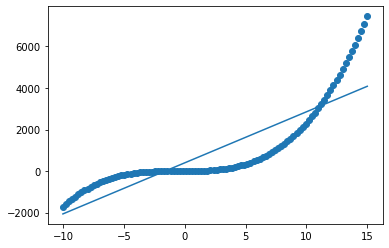

In [52]:
y_lin = lin.coef_*x+lin.intercept_
plt.scatter(x,y)
plt.plot(x,y_lin)
plt.show()

In [53]:
X=np.hstack([x.reshape(-1,1),(x*x).reshape(-1,1),(x*x*x).reshape(-1,1)])

In [54]:
X.shape

(100, 3)

In [55]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X,y)

LinearRegression()

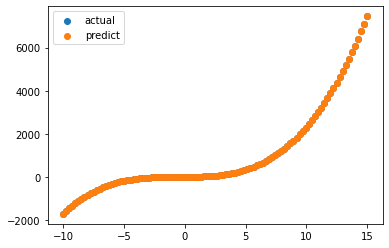

In [56]:
plt.scatter(x,y,label = 'actual')
plt.scatter(x,lin.predict(X),label='predict')
plt.legend()

Now In hstack How many we can add How should we do?So suppose we have power of 12 then So to add feature we have polynomial Feature.


#Polynomial Feature

In [57]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree =5)

X1 =pol.fit_transform(X)

In [58]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X1,y)

LinearRegression()

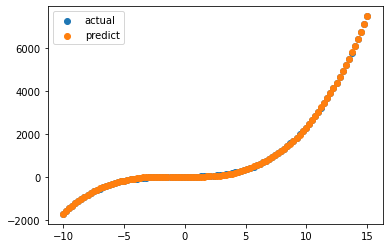

In [59]:
plt.scatter(x,y,label = 'actual')
plt.scatter(x,lin.predict(X1),label='predict')
plt.legend()

#Lets Have Some Real World Like Scenario

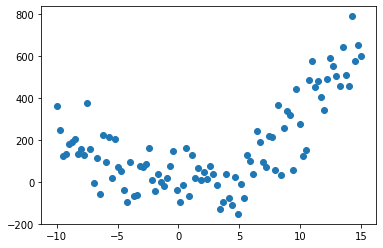

In [60]:
x = np.linspace(-10,15,100)
#data is not so uniform
y=3*x*x + 2*x + np.random.randn(100)*100#This y is made up of m1.x^2 + m2.x+m3.x^3
plt.scatter(x,y)

In [61]:
#Building Complete Dataset
#if i do something like 
X2=x.reshape(-1,1) 
X2.shape

(100, 1)

In [62]:
lin.fit(X2,y)

LinearRegression()

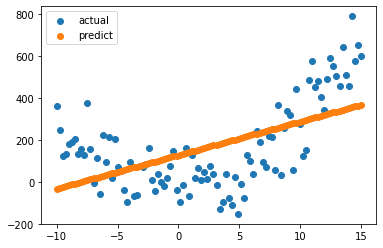

In [63]:
plt.scatter(x,y,label = 'actual')
plt.scatter(x,lin.predict(X2),label='predict')
plt.legend()

Why This Is Happening As My Ans Is dependent on more then 1 feature but i'm giving only 1 feature to fit.

In [64]:
#Lets Transform it
X4=np.hstack([x.reshape(-1,1),(x*x).reshape(-1,1)])
X4.shape

(100, 2)

In [65]:
lin.fit(X4,y)

LinearRegression()

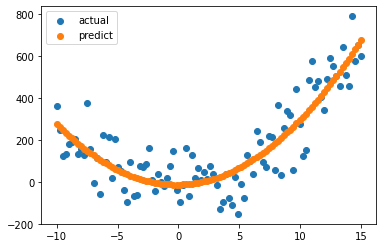

In [66]:
#Now Using It to Fit
plt.scatter(x,y,label = 'actual')
plt.scatter(x,lin.predict(X4),label='predict')
plt.legend()


Now Thing is If I have So Much to hstack,How to Do That.

We Can do That Using Polynomial Feature.

In [67]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree =10)

X5 =pol.fit_transform(X4)

In [68]:
lin.fit(X5,y)

LinearRegression()

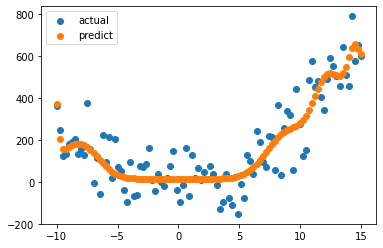

In [69]:
plt.scatter(x,y,label = 'actual')
plt.scatter(x,lin.predict(X5),label='predict')
plt.legend()


Now It is Overfitting 

Now What Should I do.

Overfitting ko Kam krne ke liye Regularization Krte hai.


For Regularization We Have Two Thing:
1.Ridge Regression
2.Lasso

#RIDGE

In [70]:
from sklearn.linear_model import Ridge
rig = Ridge(alpha=1000)
rig.fit(X5,y)

Ridge(alpha=1000)

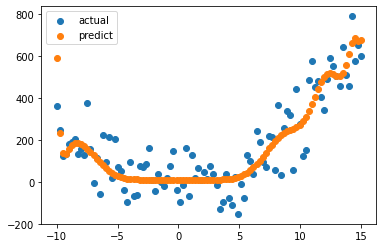

In [71]:
plt.scatter(x,y,label = 'actual')
plt.scatter(x,rig.predict(X5),label='predict')
plt.legend()


In [72]:
rig.coef_

array([-5.09326567e-06,  3.40384011e-08, -7.04860494e-07,  4.75662174e-06,
       -2.59579550e-06, -1.90182479e-06, -2.73193638e-06, -1.41556888e-06,
        1.75637134e-06, -4.53008591e-06,  2.60929446e-07, -2.75279894e-06,
       -6.46006819e-06, -1.93712683e-06,  6.50400890e-06,  5.92806763e-07,
        8.43684618e-07, -8.24240173e-07,  6.64420643e-07, -4.38005552e-07,
        6.39210801e-07,  1.44767145e-06,  1.40530552e-06, -4.02474271e-07,
        3.39400649e-06,  2.85719864e-07,  6.67082082e-07,  1.95043691e-07,
       -2.49472853e-06, -1.88985765e-06, -2.95022063e-07,  9.04910572e-07,
       -2.44497882e-06, -1.32854495e-06,  1.99558175e-06, -1.67434541e-06,
        1.75731333e-06, -2.64317921e-06,  6.05389262e-06, -7.03411355e-08,
       -1.42276401e-07,  8.94419898e-07,  3.91229698e-07, -1.74501187e-06,
       -1.54426546e-06,  2.36795546e-07, -9.43579830e-07, -8.65330887e-07,
        7.02221863e-07,  5.47134966e-07, -1.23592139e-06, -2.50822457e-07,
       -1.21450419e-06,  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.656e+05, tolerance: 4.401e+02



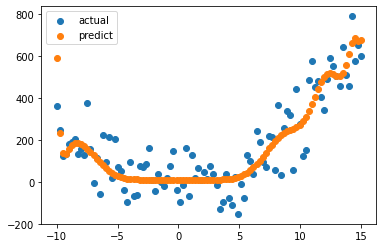

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.756e+05, tolerance: 4.401e+02



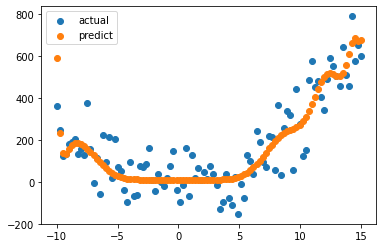

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.783e+05, tolerance: 4.401e+02



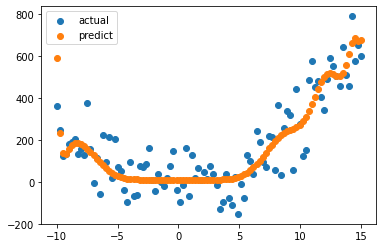

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+05, tolerance: 4.401e+02



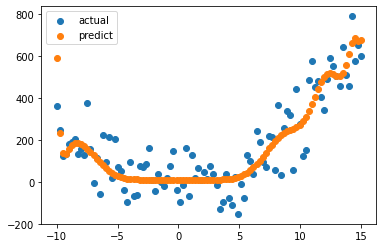

In [73]:
from sklearn.linear_model import Lasso 
#ridge se bhi better
for i in range(1,2000,500):
  las = Lasso(alpha=i)
  las.fit(X5,y)
  plt.scatter(x,y,label='actual')
  plt.scatter(x,rig.predict(X5),label = 'predict')
  plt.legend()
  plt.show()

Lasso Will Work Like this suppose some feature is bad lasso will give 0 weights to it,If Some feature is going infinite it will take to 0.
While For ridge It take towards zero not exactly zero.

In [74]:
las.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.16815257e-02, -0.00000000e+00,  1.03242328e-16,
       -4.64309317e-04, -5.63517260e-05,  1.75953806e-02, -4.03346094e-04,
       -5.75109162e-05,  9.64890012e-07, -1.18634390e-07,  7.95098062e-04,
       -4.67083527e-05,  9.00309927e-07, -1.11057564e-07,  5.05272327e-09,
        3.17722730e-11, -6.67050022e-06,  8.99531105e-07, -1.10437535e-07,
        4.99832859e-09,  3.26376142e-11,  1.09281034e-11,  8.94562705e-13,
       -5.54741500e-07, -1.11571415e-07,  4.91935571e-09,  2.82600496e-11,
        1.06318241e-11,  8.77369073e-13,  1.26858495e-14,  3.29527029e-15,
       -1.84757254e-07,  4.80134978e-09,  2.29647834e-11,  1.02038627e-11,
        8.55122520e-13,  1.10989713e-14,  3.20577004e-15, -5.93923524e-17,
        4.54779915e-18, -7.62341820e-09,  1.82958093e-11,  9.98965896e-12,
        8.38115131e-13,  1.02000774e-14,  3.14217793e-15, -6.30232625e-17,
        4.30592377e-18, -